In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
### PARAMETERS ###
t = 3500 #total num samples
p = .075 #probability random sample tests positive

In [3]:
'''
simulate a single PCR test for a mixed grouping of samples.
'''
def PCR(simulation, group, cntr):
    res = 'negative'
    for sample in group:
        if simulation[sample] == 'positive':
            res = 'positive'
    cntr += 1
    return res, cntr


ids = [i for i in range(t)]
random.shuffle(ids)
pos = ids[:int(p*t)]

print('average patient positivity rate:', p)
print('total samples:', t)
print('num positives:', len(pos))

average patient positivity rate: 0.075
total samples: 3500
num positives: 262


In [4]:
simulation = {}
for i in range(t):
    if i in pos:
        simulation[i] = 'positive'
    else:
        simulation[i] = 'negative'

#for plotting results
x = []
y = []

for group_size in range(int(math.log(t) * 2)):
    group_size += 1
    random.shuffle(ids)
    
    groups = [ids[i * group_size:(i + 1) * group_size] for i in range((len(ids) + group_size-1) // group_size )]

    test_counter = 0
    tested_positive = []
    tested_negative = []
    redos = []
    for group in groups:
        group_result, test_counter = PCR(simulation, group, test_counter)
        if group_result == 'positive':
            for sample in group:
                if group_size == 1:
                    tested_positive.append(sample)
                else:
                    redos.append(sample)
        else:
            for sample in group:
                tested_negative.append(sample)

    #run redos
    for sample in redos:
        result, test_counter = PCR(simulation, [sample], test_counter)
        if result == 'positive':
            tested_positive.append(sample)

    assert(set(tested_positive) == set(pos))

    print('group size:', group_size, '. total number of tests:', test_counter)
    print('   speedup:', test_counter / float(t))
    x.append(group_size)
    y.append(test_counter)

group size: 1 . total number of tests: 3500
   speedup: 1.0
group size: 2 . total number of tests: 2256
   speedup: 0.6445714285714286
group size: 3 . total number of tests: 1881
   speedup: 0.5374285714285715
group size: 4 . total number of tests: 1815
   speedup: 0.5185714285714286
group size: 5 . total number of tests: 1855
   speedup: 0.53
group size: 6 . total number of tests: 1868
   speedup: 0.5337142857142857
group size: 7 . total number of tests: 1991
   speedup: 0.5688571428571428
group size: 8 . total number of tests: 2006
   speedup: 0.5731428571428572
group size: 9 . total number of tests: 2153
   speedup: 0.6151428571428571
group size: 10 . total number of tests: 2240
   speedup: 0.64
group size: 11 . total number of tests: 2310
   speedup: 0.66
group size: 12 . total number of tests: 2328
   speedup: 0.6651428571428571
group size: 13 . total number of tests: 2636
   speedup: 0.7531428571428571
group size: 14 . total number of tests: 2714
   speedup: 0.7754285714285715
gr

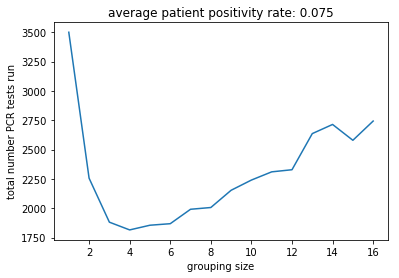

In [5]:
plt.title('average patient positivity rate: ' + str(p))
plt.xlabel('grouping size')
plt.ylabel('total number PCR tests run')
plt.plot(x,y)
plt.show()